# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

api_key = "558e56b6dce2cececb94ac03459570d9"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [5]:
#Create a DataFrame from the list
# column_names = ['city', 'Lat', 'Lng']
# column_names = ['city', 'clouds', 'country', 'date', 'humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
cities_df = pd.DataFrame(cities)
cities_df.columns = ['city']
cities_df.head(10)

,city
0,tiznit
1,calama
2,vauvert
3,saldanha
4,mataura
5,vila velha
6,rikitea
7,princeton
8,jamestown
9,pemangkat


In [6]:
#Perform API Calls



# first start by creating blank lists for our columns/data we wanna retrieve
namelist = []
cityidlist = []
latlist = []
templist = []
humidlist = []
cloudlist = []
windspeedlist = []
countrylist = []


#Then construct the URL
#make sure to use imperial
#start with a base
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'

#then add your api key and create a unique url for every city in cities (list i created earlier)
#everything has to be in lists
#open weather api is as follows: http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=558e56b6dce2cececb94ac03459570d9&q=houston

x=1

for city in cities:
    query_url = base_url + '&appid=' + str(api_key) + '&q=' + str(city)
    response = requests.get(query_url)
    json_response = response.json()
    name = cities_df.columns = ['city']
    


    #start appending lists
    # name of list.append(name of json response['what you want to return']) 
    try:
        print('Retrieving Data for City #' + str(x) + ' of ' + str((len(cities))) + " | " + city +","+json_response['sys']['country'])
        namelist.append(json_response['name'])
        cityidlist.append(json_response['id'])
        latlist.append(json_response['coord']['lat'])
        templist.append(json_response['main']['temp_max'])
        humidlist.append(json_response['main']['humidity'])
        cloudlist.append(json_response['clouds']['all'])
        windspeedlist.append(json_response['wind']['speed'])
        countrylist.append(json_response['sys']['country'])
        
        x = x + 1
        
    except KeyError:
        namelist.append(np.nan)
        cityidlist.append(np.nan)
        latlist.append(np.nan)
        templist.append(np.nan)
        humidlist.append(np.nan)
        cloudlist.append(np.nan)
        windspeedlist.append(np.nan)
        countrylist.append(np.nan)
        x = x + 1
        print("City not Found, Moving on to next City...")
        continue




Retrieving Data for City #1 of 627 | tiznit,MA
Retrieving Data for City #2 of 627 | calama,CL
Retrieving Data for City #3 of 627 | vauvert,FR
Retrieving Data for City #4 of 627 | saldanha,PT
Retrieving Data for City #5 of 627 | mataura,NZ
Retrieving Data for City #6 of 627 | vila velha,BR
Retrieving Data for City #7 of 627 | rikitea,PF
Retrieving Data for City #8 of 627 | princeton,US
Retrieving Data for City #9 of 627 | jamestown,AU
City not Found, Moving on to next City...
Retrieving Data for City #11 of 627 | mar del plata,AR
Retrieving Data for City #12 of 627 | megion,RU
Retrieving Data for City #13 of 627 | antofagasta,CL
Retrieving Data for City #14 of 627 | upernavik,GL
Retrieving Data for City #15 of 627 | severo-kurilsk,RU
Retrieving Data for City #16 of 627 | punta arenas,CL
Retrieving Data for City #17 of 627 | fort nelson,CA
Retrieving Data for City #18 of 627 | port elizabeth,US
Retrieving Data for City #19 of 627 | tuktoyaktuk,CA
Retrieving Data for City #20 of 627 | man

Retrieving Data for City #166 of 627 | yelizovo,RU
Retrieving Data for City #167 of 627 | bahia blanca,AR
City not Found, Moving on to next City...
Retrieving Data for City #169 of 627 | castro,CL
Retrieving Data for City #170 of 627 | yauya,PE
Retrieving Data for City #171 of 627 | presidencia roque saenz pena,AR
Retrieving Data for City #172 of 627 | cayenne,GF
Retrieving Data for City #173 of 627 | neiafu,TO
Retrieving Data for City #174 of 627 | port hedland,AU
Retrieving Data for City #175 of 627 | balsas,BR
Retrieving Data for City #176 of 627 | edd,ER
Retrieving Data for City #177 of 627 | flinders,AU
Retrieving Data for City #178 of 627 | tual,ID
Retrieving Data for City #179 of 627 | maltahohe,NA
Retrieving Data for City #180 of 627 | gorontalo,ID
Retrieving Data for City #181 of 627 | ribeira grande,PT
City not Found, Moving on to next City...
Retrieving Data for City #183 of 627 | nisko,PL
Retrieving Data for City #184 of 627 | thinadhoo,MV
Retrieving Data for City #185 of 6

Retrieving Data for City #330 of 627 | marsh harbour,BS
Retrieving Data for City #331 of 627 | hobyo,SO
Retrieving Data for City #332 of 627 | diamantina,BR
Retrieving Data for City #333 of 627 | virginia beach,US
Retrieving Data for City #334 of 627 | bandar-e lengeh,IR
Retrieving Data for City #335 of 627 | victoria,BN
Retrieving Data for City #336 of 627 | pacifica,US
Retrieving Data for City #337 of 627 | pangai,TO
Retrieving Data for City #338 of 627 | mindelo,PT
Retrieving Data for City #339 of 627 | nosy varika,MG
Retrieving Data for City #340 of 627 | redmond,US
Retrieving Data for City #341 of 627 | lima,PE
Retrieving Data for City #342 of 627 | zhaozhou,CN
Retrieving Data for City #343 of 627 | ondjiva,AO
Retrieving Data for City #344 of 627 | ewa beach,US
Retrieving Data for City #345 of 627 | shelburne,CA
Retrieving Data for City #346 of 627 | sao filipe,CV
Retrieving Data for City #347 of 627 | bud,NO
Retrieving Data for City #348 of 627 | lavrentiya,RU
City not Found, Mov

Retrieving Data for City #494 of 627 | quatre cocos,MU
Retrieving Data for City #495 of 627 | savannah bight,HN
Retrieving Data for City #496 of 627 | malyye derbety,RU
Retrieving Data for City #497 of 627 | fomboni,KM
Retrieving Data for City #498 of 627 | nema,RU
Retrieving Data for City #499 of 627 | vazhiny,RU
Retrieving Data for City #500 of 627 | butterworth,MY
City not Found, Moving on to next City...
Retrieving Data for City #502 of 627 | hualmay,PE
Retrieving Data for City #503 of 627 | portland,US
Retrieving Data for City #504 of 627 | chilca,PE
Retrieving Data for City #505 of 627 | teya,MX
Retrieving Data for City #506 of 627 | nouadhibou,MR
Retrieving Data for City #507 of 627 | matara,PE
Retrieving Data for City #508 of 627 | shingu,JP
Retrieving Data for City #509 of 627 | pochutla,MX
Retrieving Data for City #510 of 627 | neryungri,RU
Retrieving Data for City #511 of 627 | padang,ID
Retrieving Data for City #512 of 627 | new ross,IE
Retrieving Data for City #513 of 627 

In [7]:
# Convert retrieved lists to a dictionary first and then to a dataframe
# formatting for creating a dictionary is       variable_name = {"Key": value, "Key": value, etc}

weather_dict = {"Name": namelist,
               "Country_id": cityidlist,
                "Country": countrylist,
                "Cloudiness (%)": cloudlist,
                "Max Temperature (F)": templist,
                "Latitude (Deg)": latlist,
                "Humidity (%)": humidlist,
                "Wind Speed (mph)": windspeedlist
               }

#create the dataframe from the dictionary
#format is vairable_name = pd.DataFrame(name of dictionary)
weather_df = pd.DataFrame(weather_dict)

#Drop the Nan Values
weather_df = weather_df.dropna(how='any')

weather_df.head(10)

,Name,Country_id,Country,Cloudiness (%),Max Temperature (F),Latitude (Deg),Humidity (%),Wind Speed (mph)
0,Tiznit,2527089.0,MA,8.0,48.18,29.70,99.0,1.59
1,Calama,3897347.0,CL,0.0,55.40,-22.46,43.0,8.05
2,Vauvert,6431476.0,FR,92.0,42.80,43.69,93.0,4.70
3,Saldanha,2737599.0,PT,0.0,32.97,41.42,93.0,5.95
4,Mataura,6201424.0,NZ,100.0,54.21,-46.19,96.0,24.07
5,Vila Velha,6320062.0,BR,20.0,77.00,-3.71,94.0,3.36
6,Rikitea,4030556.0,PF,92.0,80.22,-23.12,99.0,13.56
7,Princeton,4906818.0,US,1.0,12.20,41.37,74.0,13.87
8,Jamestown,2069194.0,AU,0.0,77.34,-33.21,82.0,5.39
10,Mar del Plata,3863379.0,AR,0.0,71.04,-46.43,37.0,18.48


In [8]:
#Convert this dataframe to a csv and put in in the Output folder
#Format is dfname.to_csv("folder/filename.csv", index=False)
weather_df.to_csv('Cities.csv', index=False)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

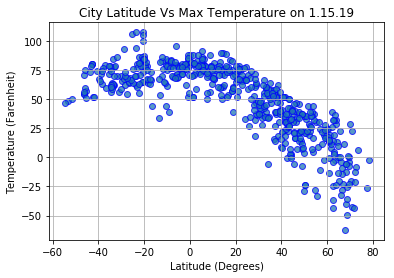

In [9]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)
plt.scatter(latlist, templist, marker ='o', edgecolors = "blue", alpha =0.75)

#label all the items
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Farenheit)")
plt.title("City Latitude Vs Max Temperature on 1.15.19")
plt.grid()

#save as png
plt.savefig("Latitude_Vs_Temp")
#show the plot
plt.show()


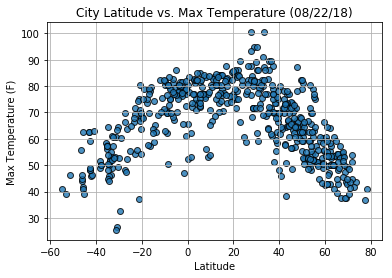

#### Latitude vs. Humidity Plot

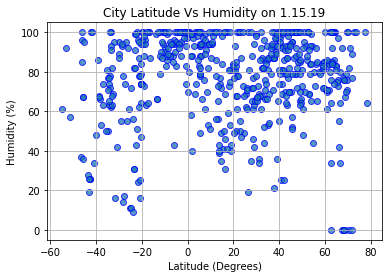

In [10]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)
plt.scatter(latlist, humidlist, marker ='o', edgecolors = "blue", alpha =0.75)

#label all the items
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs Humidity on 1.15.19")
plt.grid()

#save as png
plt.savefig("Latitude_Vs_Humidity")
#show the plot
plt.show()

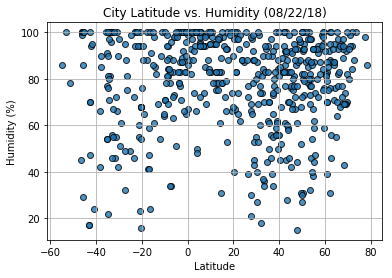

#### Latitude vs. Cloudiness Plot

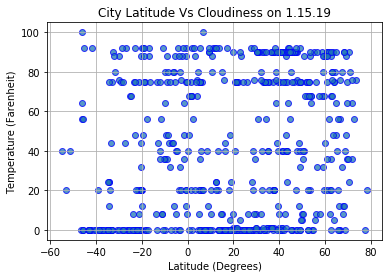

In [11]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)
plt.scatter(latlist, cloudlist, marker ='o', edgecolors = "blue", alpha =0.75)

#label all the items
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Farenheit)")
plt.title("City Latitude Vs Cloudiness on 1.15.19")
plt.grid()

#save as png
plt.savefig("Latitude_Vs_Cloudiness")
#show the plot
plt.show()


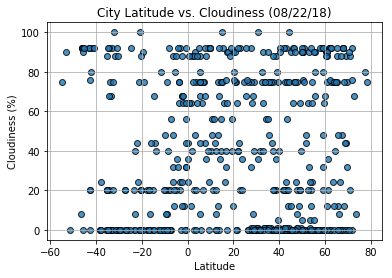

#### Latitude vs. Wind Speed Plot

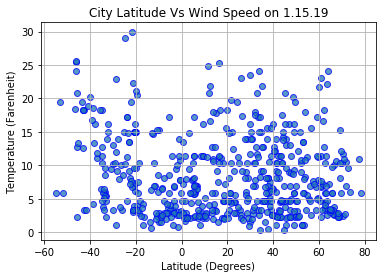

In [12]:
#Convert dataframe to scatter plot
#Format for scatter plot is plt.scatter(x_axis, y_axis, s=whatever size, marker='o', alpha= transparency, 
#edgecolors = color,  and other options)
plt.scatter(latlist, windspeedlist, marker ='o', edgecolors = "blue", alpha =0.75)

#label all the items
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Farenheit)")
plt.title("City Latitude Vs Wind Speed on 1.15.19")
plt.grid()

#save as png
plt.savefig("Latitude_Vs_Wind_Speed")
#show the plot
plt.show()


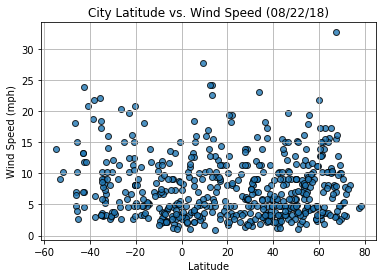